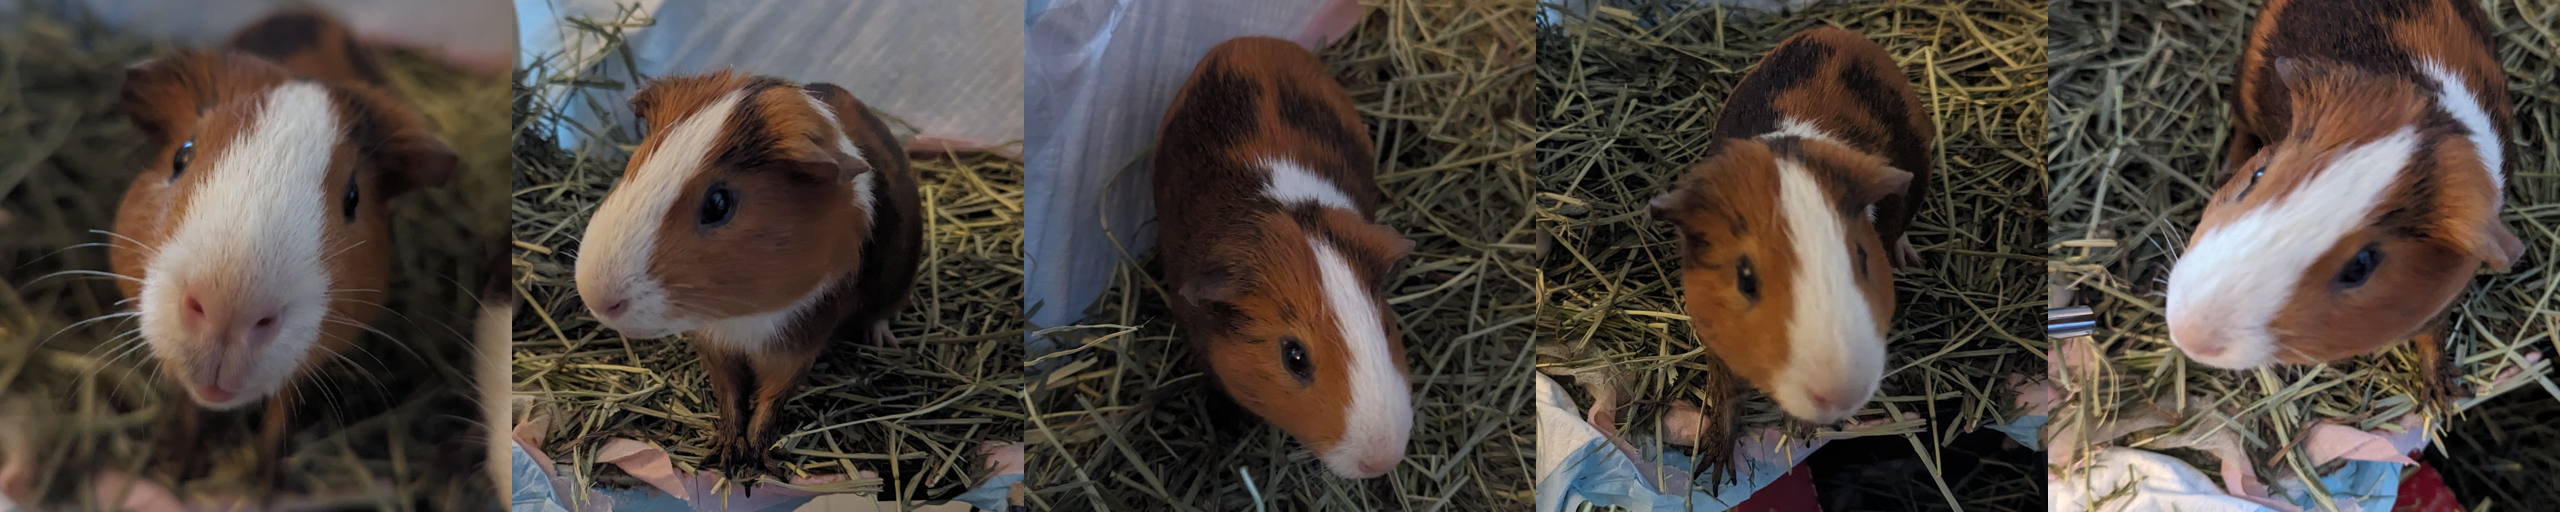

In [2]:
# resizing the imgs

from PIL import Image
import glob
import os

size = (512, 512)

# get all the files in a folder, make sure all are image files
files = glob.glob('./training_data/raw/*')

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid
images = []
for fil in files:
    # get the basename, e.g. "dragon.jpg" -> ("dragon", ".jpg")
    basename = os.path.splitext(os.path.basename(fil))[0]
    with Image.open(fil) as img:
        # resize the image to 512 x 512
        img = img.resize(size)
        images.append(img)
        # save the resized image, modify the resample method if required, modify the output directory as well
        img.save(f"./training_data/key/{basename}.png", format="PNG", resample=Image.Resampling.NEAREST)
image_grid(images, 1, len(images))

In [2]:
# install librareis for statble defussion
# source from huggy face
!pip install -U -qq git+https://github.com/huggingface/diffusers.git
!pip install -qq accelerate transformers ftfy

In [7]:
!pip install git+https://github.com/huggingface/diffusers.git
!pip install accelerate>=0.16.0 torchvision transformers>=4.25.1 datasets ftfy tensorboard Jinja2 peft==0.7.0

  Cloning https://github.com/huggingface/diffusers.git to c:\users\docto\appdata\local\temp\pip-req-build-lg0t_4vh
  Resolved https://github.com/huggingface/diffusers.git to commit ae05050db9d37d5af48a6cd0d6510a5ffb1c1cd4
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git 'C:\Users\docto\AppData\Local\Temp\pip-req-build-lg0t_4vh'


In [ ]:
# from hugging face website, recommended processes for finetuning a text-to-image model
# code is modified to serve SGD/CG

export MODEL_NAME="CompVis/stable-diffusion-v1-4"
export TRAIN_DIR="path_to_your_dataset"
export OUTPUT_DIR="path_to_save_model"

accelerate launch train_text_to_image.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --train_data_dir=$TRAIN_DIR \
  --use_ema \
  --resolution=512 --center_crop --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --mixed_precision="fp16" \
  --max_train_steps=15000 \
  --learning_rate=1e-05 \
  --max_grad_norm=1 \
  --lr_scheduler="constant" --lr_warmup_steps=0 \
  --output_dir=${OUTPUT_DIR}